In [1]:
import pandas as pd
import statistics as s
import scipy.stats as ss

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.shape

(35, 2)

In [5]:
df.salary.mean()

83945.6

In [6]:
df['salary'].median()

81363.0

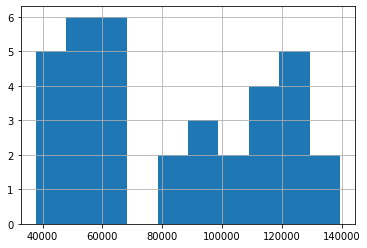

In [7]:
df.salary.hist()

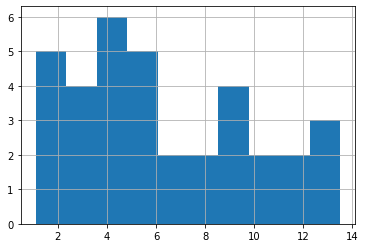

In [8]:
df.exp.hist()

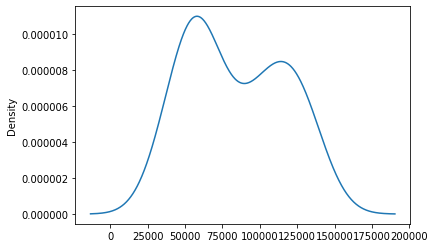

In [9]:
df.salary.plot.kde()

In [10]:
df.exp.mode()

0    3.2
1    4.0
dtype: float64

In [11]:
q1 = df.exp.quantile(.25)
q3 = df.exp.quantile(.75)

### 06-JULY

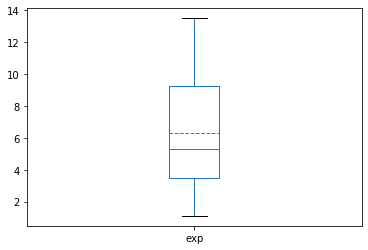

In [76]:
df.exp.plot.box(showmeans=True, meanline=True)

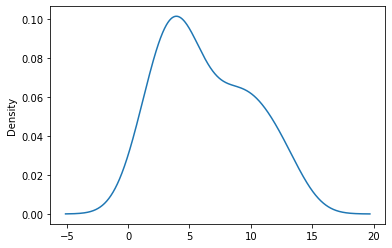

In [77]:
df.exp.plot.kde()

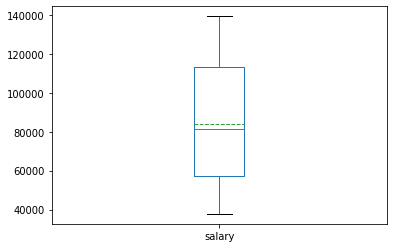

In [78]:
df.salary.plot.box(showmeans=True, meanline=True)

### Ages Examples

In [81]:
ages  = pd.Series([20,22,25,20,34,30,30,20,30,70,75])

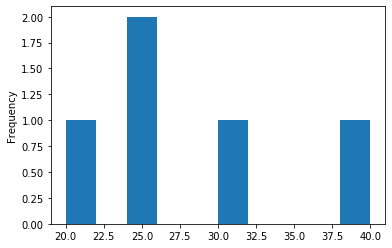

In [79]:
ages.plot.hist()

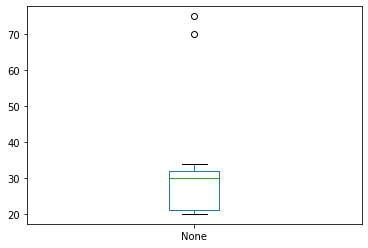

In [82]:
ages.plot.box()

In [83]:
ss.skew(df['exp']), ss.skew(df['salary'])

(0.4019376065648398, 0.1999389188655196)

### Salaries

In [18]:
salaries = pd.Series([200000,300000, 20000000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [19]:
ss.skew(salaries)

1.4999172216610963

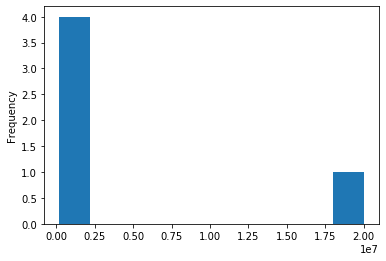

In [20]:
salaries.plot.hist()

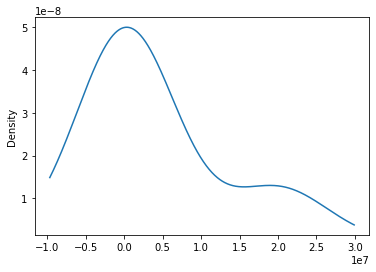

In [21]:
salaries.plot.kde()

In [22]:
q1 = salaries.quantile(.25)
q3 = salaries.quantile(.75)
iqr = q3 - q1

In [23]:
# Upper outliers
for v in salaries:
    if v > (q3 + 1.5 * iqr):
        print(v)

20000000


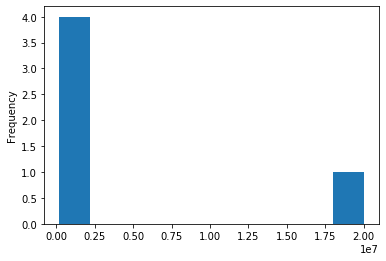

In [24]:
salaries.plot.hist()

In [25]:
ss.skew(salaries)

1.4999172216610963

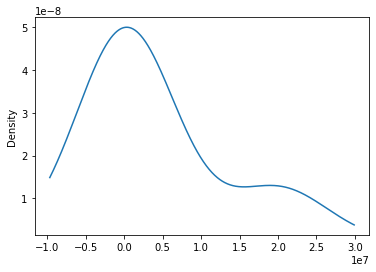

In [26]:
salaries.plot.kde()

### Kurtosis

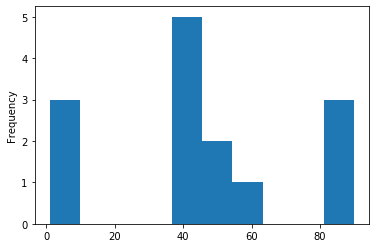

In [60]:
marks_list = [1,2,3,40,40,40,50,50,40,55,45,90,90,90]
marks = pd.Series(marks_list)
marks.plot.hist()

In [62]:
ss.kurtosis(marks)

-0.7602206866591072

In [71]:
marks_list = [20,20,20,20,20]   # No tails at all
marks = pd.Series(marks_list)

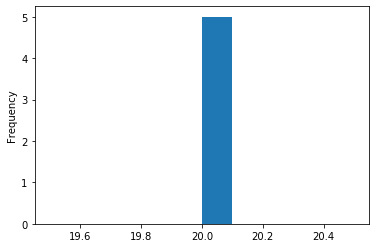

In [72]:
marks.plot.hist()

In [73]:
ss.kurtosis(marks)

-3.0

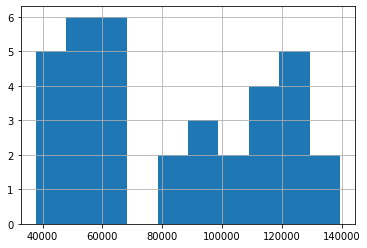

In [65]:
df.salary.hist()

In [68]:
ss.kurtosis(df.salary)

-1.3904143013696357

In [69]:
ss.kurtosis(df.exp)

-1.024498708144493

## Correlaton 

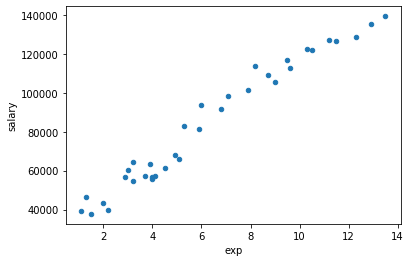

In [84]:
df.plot.scatter(x='exp',y='salary')

In [85]:
results = ss.pearsonr(df['exp'], df['salary'])
print(f"{results[0] * 100:.2f}, {results[1]*100:.2f}")

98.24, 0.00


In [86]:
salaries = pd.Series([200000,300000,500000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [87]:
persons =pd.DataFrame( {'salary': salaries, 'age' : ages})

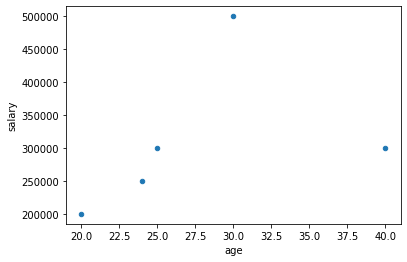

In [88]:
persons.plot.scatter(x = 'age', y = 'salary')

In [89]:
ss.pearsonr(persons['age'], persons['salary'])

(0.40181541321778125, 0.5025140084907671)

## Regression 

In [90]:
det = ss.linregress(df['exp'], df['salary'])

In [91]:
det

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443)

In [92]:
exp = 4.5
salary = det.intercept + det.slope * exp   #  y = a + bx 
print(exp, salary)

4.5 68153.26090631269


In [93]:
pred_salary = []
for e in df['exp']:
    pred_salary.append(det.intercept + det.slope * e)

In [95]:
df.salary - pred_salary

0       878.338654
1      5993.950444
2     -4226.437765
3     -2798.408289
4     -8178.796498
5      2459.844769
6      5094.650664
7     -2356.737545
8      7643.262455
9     -3978.708069
10      303.903722
11    -7993.290383
12    -6830.290383
13    -7579.484487
14    -7042.260906
15    -3708.037325
16    -7363.425535
17     7949.186256
18      985.021628
19    12688.827523
20     3501.274685
21     7416.692371
22     3460.139534
23    13350.557220
24     4603.586696
25    -1864.995618
26     5156.033858
27      -51.160246
28     3592.481021
29     1327.092811
30      687.734078
31    -2520.848236
32    -7497.401073
33    -5826.565702
34    -7275.730330
Name: salary, dtype: float64

In [42]:
f"{((pred_salary - df['salary']) ** 2).sum():.0f}"

'1225236887'

In [43]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [44]:
df['predicted'] = pred_salary

In [45]:
df

,exp,salary,predicted
0,1.1,39343,38464.661346
1,1.3,46205,40211.049556
2,1.5,37731,41957.437765
3,2.0,43525,46323.408289
4,2.2,39891,48069.796498
5,2.9,56642,54182.155231
6,3.0,60150,55055.349336
7,3.2,54445,56801.737545
8,3.2,64445,56801.737545
9,3.7,57189,61167.708069


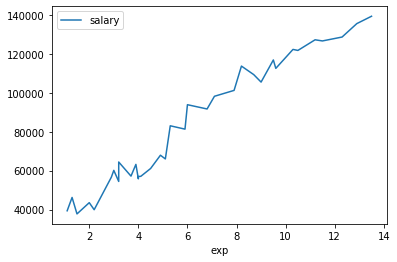

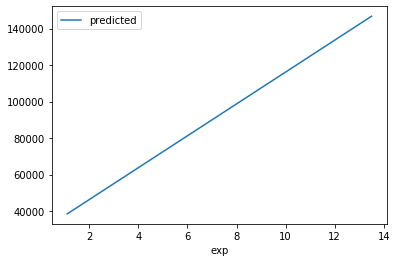

In [46]:
df.plot.line(x='exp',y='salary')
df.plot.line(x='exp',y='predicted')